UPLOAD FILE

In [20]:
from google.colab import files
uploaded = files.upload()

Saving cardio.csv to cardio (1).csv


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the dataset
df = pd.read_csv('cardio.csv', sep=';')  # Use sep=';' because the file uses ; as a delimiter

# Display the first few rows
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
2,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
3,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
4,8,21914,1,151,67.0,120,80,2,2,0,0,0,0


In [22]:
# How many rows and columns?
print("Shape:", df.shape)

# Summary of column types and missing values
df.info()

Shape: (69997, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69997 entries, 0 to 69996
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69997 non-null  int64  
 1   age          69997 non-null  int64  
 2   gender       69997 non-null  int64  
 3   height       69997 non-null  int64  
 4   weight       69997 non-null  float64
 5   ap_hi        69997 non-null  int64  
 6   ap_lo        69997 non-null  int64  
 7   cholesterol  69997 non-null  int64  
 8   gluc         69997 non-null  int64  
 9   smoke        69997 non-null  int64  
 10  alco         69997 non-null  int64  
 11  active       69997 non-null  int64  
 12  cardio       69997 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [23]:
# Convert age from days to years
df['age_years'] = (df['age'] / 365).astype(int)

# Show the updated dataset
df[['age', 'age_years']].head()

,age,age_years
0,18393,50
1,18857,51
2,17623,48
3,17474,47
4,21914,60


In [24]:
# Check the range of important columns
df[['height', 'weight', 'ap_hi', 'ap_lo']].describe()

,height,weight,ap_hi,ap_lo
count,69997.000000,69997.000000,69997.000000,69997.000000
mean,164.358915,74.204942,128.817092,96.630698
std,8.209839,14.395578,154.014714,188.476564
min,55.000000,10.000000,-150.000000,-70.000000
25%,159.000000,65.000000,120.000000,80.000000
50%,165.000000,72.000000,120.000000,80.000000
75%,170.000000,82.000000,140.000000,90.000000
max,250.000000,200.000000,16020.000000,11000.000000


In [25]:
# Filter out clearly invalid data
df_clean = df[
    (df['height'] >= 100) & (df['height'] <= 250) &
    (df['weight'] >= 30) & (df['weight'] <= 200) &
    (df['ap_hi'] >= 80) & (df['ap_hi'] <= 240) &
    (df['ap_lo'] >= 40) & (df['ap_lo'] <= 180)
]

# Show how many rows remain
print("Before cleaning:", df.shape[0])
print("After cleaning: ", df_clean.shape[0])



Before cleaning: 69997
After cleaning:  68720


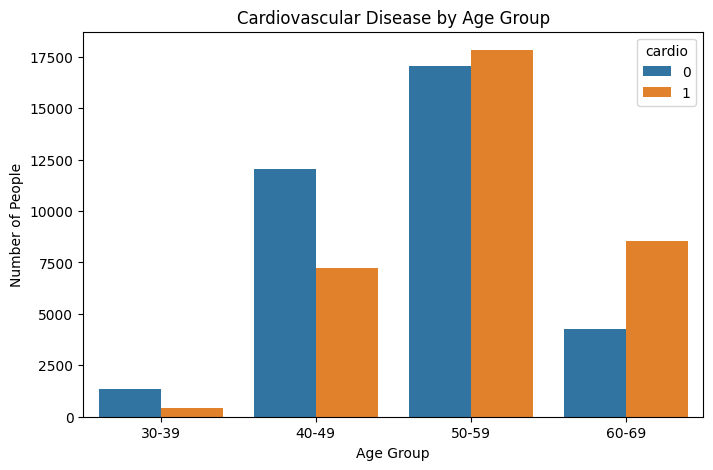

In [26]:
df_clean = df_clean.copy()

# Create age groups
df_clean.loc[:, 'age_group'] = pd.cut(
    df_clean['age_years'],
    bins=[29, 39, 49, 59, 69],
    labels=['30-39', '40-49', '50-59', '60-69']
)

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x='age_group', hue='cardio')
plt.title("Cardiovascular Disease by Age Group")
plt.ylabel("Number of People")
plt.xlabel("Age Group")
plt.show()


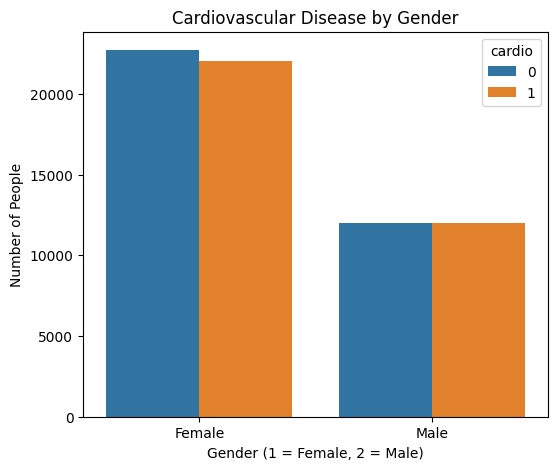

In [27]:
# Gender distribution by cardio
plt.figure(figsize=(6, 5))
sns.countplot(data=df_clean, x='gender', hue='cardio')
plt.title("Cardiovascular Disease by Gender")
plt.xlabel("Gender (1 = Female, 2 = Male)")
plt.ylabel("Number of People")
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()


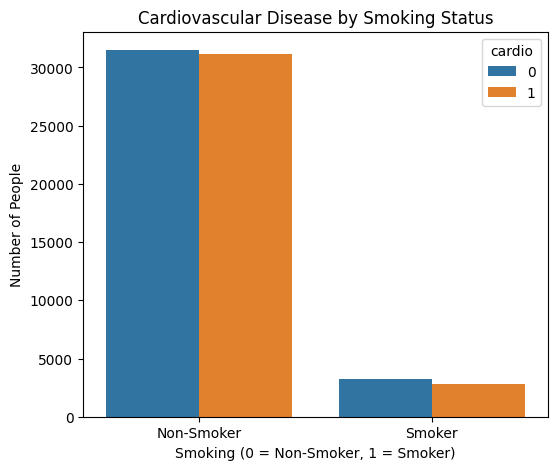

In [28]:
# Smoking status
plt.figure(figsize=(6, 5))
sns.countplot(data=df_clean, x='smoke', hue='cardio')
plt.title("Cardiovascular Disease by Smoking Status")
plt.xlabel("Smoking (0 = Non-Smoker, 1 = Smoker)")
plt.ylabel("Number of People")
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.show()


In [29]:
def categorize_bp(ap_hi):
    if ap_hi < 90:
        return 'Low'
    elif 90 <= ap_hi <= 120:
        return 'Normal'
    elif 121 <= ap_hi <= 139:
        return 'Elevated'
    elif 140 <= ap_hi <= 159:
        return 'High Stage 1'
    else:
        return 'High Stage 2'

df_clean = df_clean.copy()

# Apply the function
df_clean.loc[:, 'bp_category'] = df_clean['ap_hi'].apply(categorize_bp)

# View unique categories to confirm
df_clean['bp_category'].value_counts()


,count
bp_category,
Normal,40339
High Stage 1,13994
Elevated,9797
High Stage 2,4476
Low,114


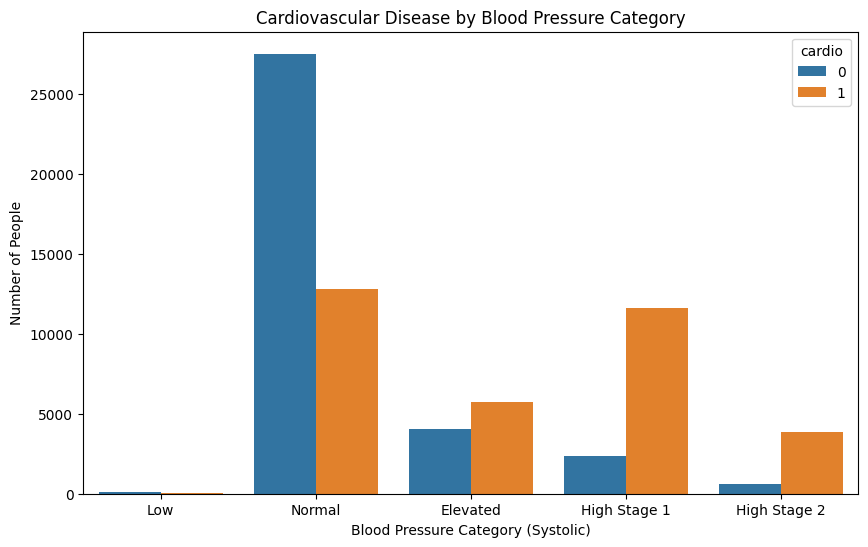

In [30]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_clean, x='bp_category', hue='cardio', order=['Low', 'Normal', 'Elevated', 'High Stage 1', 'High Stage 2'])
plt.title("Cardiovascular Disease by Blood Pressure Category")
plt.xlabel("Blood Pressure Category (Systolic)")
plt.ylabel("Number of People")
plt.show()


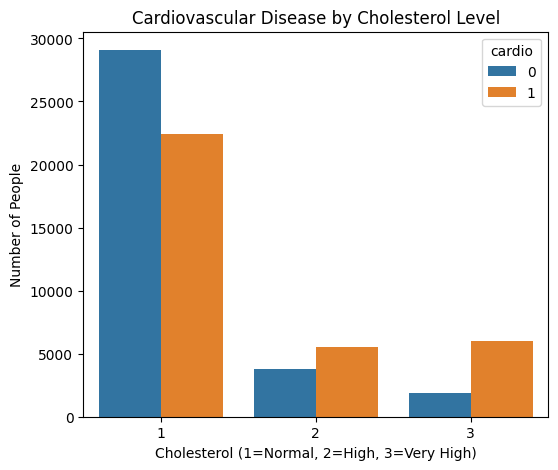

In [31]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df_clean, x='cholesterol', hue='cardio')
plt.title("Cardiovascular Disease by Cholesterol Level")
plt.xlabel("Cholesterol (1=Normal, 2=High, 3=Very High)")
plt.ylabel("Number of People")
plt.show()

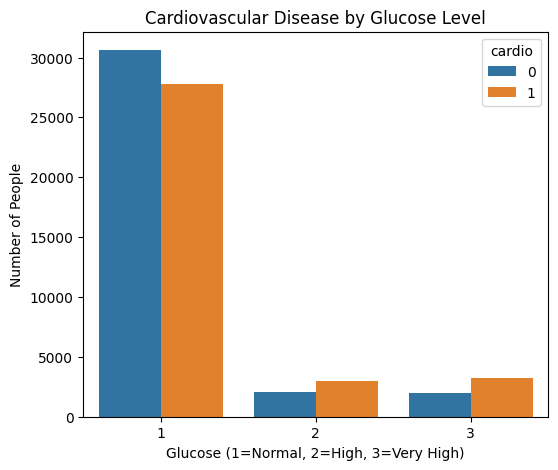

In [32]:
plt.figure(figsize=(6, 5))
sns.countplot(data=df_clean, x='gluc', hue='cardio')
plt.title("Cardiovascular Disease by Glucose Level")
plt.xlabel("Glucose (1=Normal, 2=High, 3=Very High)")
plt.ylabel("Number of People")
plt.show()

In [38]:
#Feature Engineering

#Create a new BMI column from weight and height
df_clean['BMI'] = df_clean['weight'] / ((df_clean['height'] / 100) ** 2)

#Create a binary feature: Overweight or not
df_clean['Overweight'] = (df_clean['BMI'] > 25).astype(int)

#Encode categorical variables (example: cholesterol levels)
df_clean['cholesterol'] = df_clean['cholesterol'].replace({1: 0, 2: 1, 3: 2})

#Encode categorical variables (example: glucose levels)
df_clean['gluc'] = df_clean['gluc'].replace({1: 0, 2: 1, 3: 2})

#Drop unnecessary or duplicate columns if any
df_clean = df_clean.drop(columns=['age', 'id'], errors='ignore')


In [39]:
#Model Building

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#One-hot encode remaining categorical columns
categorical_cols = ['age_group', 'bp_category']
df_clean_encoded = pd.get_dummies(df_clean, columns=categorical_cols, drop_first=True)

#Define features and target
X = df_clean_encoded.drop(columns=['cardio'])
y = df_clean_encoded['cardio']

#Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Scale numeric features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Initialize models
logreg = LogisticRegression(random_state=42)
dtree = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)

#Train models
logreg.fit(X_train_scaled, y_train)
dtree.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)

print("Models trained successfully!")


Models trained successfully!


In [40]:
#Model Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Predict on the test set
y_pred_logreg = logreg.predict(X_test_scaled)
y_pred_dtree = dtree.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)

#Function to evaluate a model
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("\n")

#Evaluate all models
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")
evaluate_model(y_test, y_pred_dtree, "Decision Tree")
evaluate_model(y_test, y_pred_rf, "Random Forest")


--- Logistic Regression ---
Accuracy: 0.7311554132712457
Confusion Matrix:
 [[5620 1305]
 [2390 4429]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.81      0.75      6925
           1       0.77      0.65      0.71      6819

    accuracy                           0.73     13744
   macro avg       0.74      0.73      0.73     13744
weighted avg       0.74      0.73      0.73     13744



--- Decision Tree ---
Accuracy: 0.6351135040745053
Confusion Matrix:
 [[4468 2457]
 [2558 4261]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.65      0.64      6925
           1       0.63      0.62      0.63      6819

    accuracy                           0.64     13744
   macro avg       0.64      0.64      0.64     13744
weighted avg       0.64      0.64      0.64     13744



--- Random Forest ---
Accuracy: 0.7032887077997672
Confusion Matrix:
 [[4920 2005]
 [2073 4746

Top features influencing cardiovascular disease:
BMI                         0.195645
weight                      0.146053
height                      0.142550
age_years                   0.120139
ap_hi                       0.115630
ap_lo                       0.065998
bp_category_Normal          0.052666
bp_category_High Stage 1    0.030542
cholesterol                 0.025757
gender                      0.018579
dtype: float64


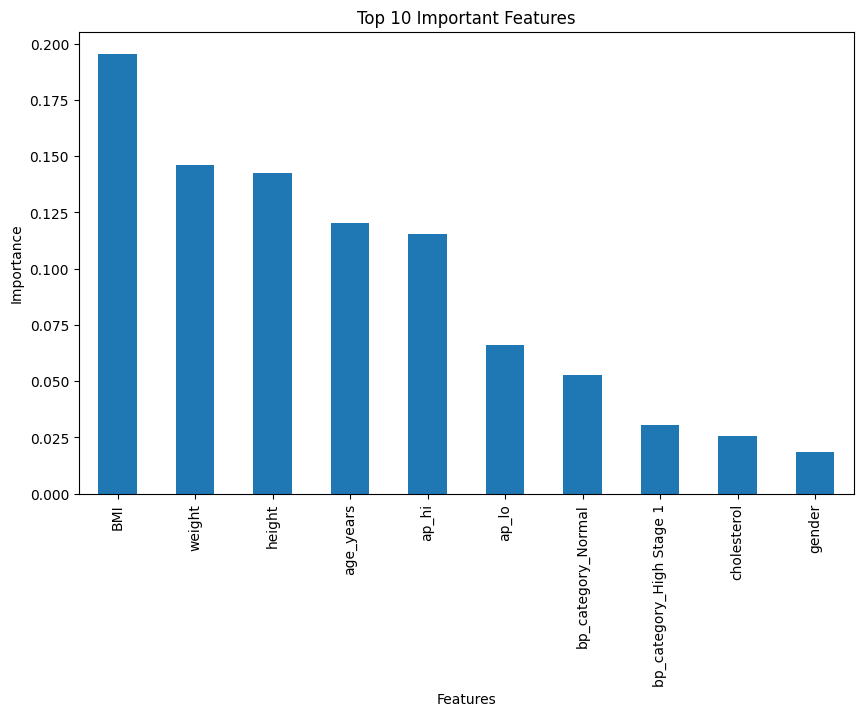


Random Forest is often the best-performing model.
Most important features may include BMI, Overweight, ap_hi, age groups, cholesterol, and glucose.
Logistic Regression gives linear insights, Decision Tree shows rules, and Random Forest combines many trees for better accuracy.
Possible improvements:
   - Hyperparameter tuning using GridSearchCV
   - More feature engineering (interaction terms, ratios)
   - Try boosting models like XGBoost or LightGBM for better performance



In [43]:
#Feature Importance from Random Forest (usually the best model for tabular data)
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

#Display top features
print("Top features influencing cardiovascular disease:")
print(feature_importances.head(10))

# Visualize feature importance
plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='bar')
plt.title("Top 10 Important Features")
plt.ylabel("Importance")
plt.xlabel("Features")
plt.show()

#Summary of insights
print("""
Random Forest is often the best-performing model.
Most important features may include BMI, Overweight, ap_hi, age groups, cholesterol, and glucose.
Logistic Regression gives linear insights, Decision Tree shows rules, and Random Forest combines many trees for better accuracy.
Possible improvements:
   - Hyperparameter tuning using GridSearchCV
   - More feature engineering (interaction terms, ratios)
   - Try boosting models like XGBoost or LightGBM for better performance
""")
